In [5]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline


Using TensorFlow backend.


In [2]:
%pwd


'D:\\Python\\DataScience\\DataScience6105\\Assignment3'

In [3]:
path = 'D:\\Python\\DataScience\\DataScience6105\\Assignment3'


In [6]:
'''Read the data from the path'''
df = pd.read_csv(f'{path}/pima-indians-diabetes(2).data',header = None)
'''Show the data size'''
print(df.shape)
df.head(2)


(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-test split

In [7]:
'''
Separate out X and Y
 pre-process the data by scaling/standardizing the 8 columns 
'''
X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]


In [8]:
'''Split the two parts of the data and wait to split again for validation/test data'''
(X_train, X_valid_test, Y_train, Y_valid_test) = train_test_split(X, Y, test_size=0.4, random_state=1)
print(X_train.shape,X_valid_test.shape,Y_train.shape,Y_valid_test.shape)


(460, 8) (308, 8) (460, 1) (308, 1)


In [9]:
'''Split the second part of data to validation/test data'''
(X_valid, X_test, Y_valid, Y_test) = train_test_split(X_valid_test, Y_valid_test, test_size=0.5, random_state=1)
print(X_valid.shape,X_test.shape,Y_valid.shape,Y_test.shape)


(154, 8) (154, 8) (154, 1) (154, 1)


# Build and compile a deep learning model

In [10]:
'''Build the deep neural network'''
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [11]:
'''Compile the DNN'''
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
'''
Fit the DNN with train data
Make Epoch versus train set accuracy, and validation set accuracy
'''
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=100, batch_size=5)


C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 460 samples, validate on 154 samples
Epoch 1/100
460/460 [==============================] - 2s 4ms/step - loss: 0.6800 - accuracy: 0.6543 - val_loss: 0.6824 - val_accuracy: 0.6169
Epoch 2/100
460/460 [==============================] - 0s 521us/step - loss: 0.6637 - accuracy: 0.6543 - val_loss: 0.6808 - val_accuracy: 0.6169
Epoch 3/100
460/460 [==============================] - 0s 604us/step - loss: 0.6549 - accuracy: 0.6543 - val_loss: 0.6912 - val_accuracy: 0.6169
Epoch 4/100
460/460 [==============================] - 0s 604us/step - loss: 0.6434 - accuracy: 0.6565 - val_loss: 0.6907 - val_accuracy: 0.6169
Epoch 5/100
460/460 [==============================] - 0s 747us/step - loss: 0.6280 - accuracy: 0.6674 - val_loss: 0.6662 - val_accuracy: 0.5779
Epoch 6/100
460/460 [==============================] - 0s 639us/step - loss: 0.6153 - accuracy: 0.6891 - val_loss: 0.6606 - val_accuracy: 0.5909
Epoch 7/100
460/460 [==============================] - 0s 608us/step - loss: 0.6132 - 

# Report results

In [13]:
'''Evaluate the model using the test data'''
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))


154/154 [==============================] - 0s 195us/step
Accuracy: 70.13%


In [15]:
'''Evaluate the model using the train data'''
scores = model.evaluate(X_train, Y_train)
print ("Accuracy: %.2f%%" %(scores[1]*100))


460/460 [==============================] - 0s 528us/step
Accuracy: 75.65%


In [40]:
'''
Writing a function to record callback when doing the model.fit
Achieve y_score in each epoch during the traing
'''
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
class Metrics(Callback):
    def __init__(self, validation_data=()):
        self.x_val,self.y_val = validation_data
        self.score = []
    def on_epoch_end(self, epoch, log={}):
        y_pred = self.model.predict(self.x_val)
        self.score.append(roc_auc_score(self.y_val, y_pred))

metrics = Metrics(validation_data=(X_valid, Y_valid))
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=154, batch_size=5, callbacks=[metrics])


Train on 460 samples, validate on 154 samples
Epoch 1/154
460/460 [==============================] - 0s 728us/step - loss: 0.4448 - accuracy: 0.7804 - val_loss: 0.5379 - val_accuracy: 0.7792
Epoch 2/154
460/460 [==============================] - 0s 730us/step - loss: 0.4620 - accuracy: 0.7543 - val_loss: 0.5785 - val_accuracy: 0.7857
Epoch 3/154
460/460 [==============================] - 0s 606us/step - loss: 0.4398 - accuracy: 0.7761 - val_loss: 0.5628 - val_accuracy: 0.7727
Epoch 4/154
460/460 [==============================] - 0s 545us/step - loss: 0.4389 - accuracy: 0.7870 - val_loss: 0.5349 - val_accuracy: 0.7857
Epoch 5/154
460/460 [==============================] - 0s 752us/step - loss: 0.4494 - accuracy: 0.7826 - val_loss: 0.5528 - val_accuracy: 0.7922
Epoch 6/154
460/460 [==============================] - 0s 607us/step - loss: 0.4414 - accuracy: 0.7891 - val_loss: 0.5656 - val_accuracy: 0.7727
Epoch 7/154
460/460 [==============================] - 0s 659us/step - loss: 0.4481 

C:\Users\Zhou\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


In [57]:
'''
Get TPR = TP / (TP+FN), FPR = FP / (FP + TN)
Get and report AUC value
'''
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
Y_score = np.array(metrics.score)

fpr, tpr,_ = roc_curve(Y_test,Y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)


0.6167307692307692


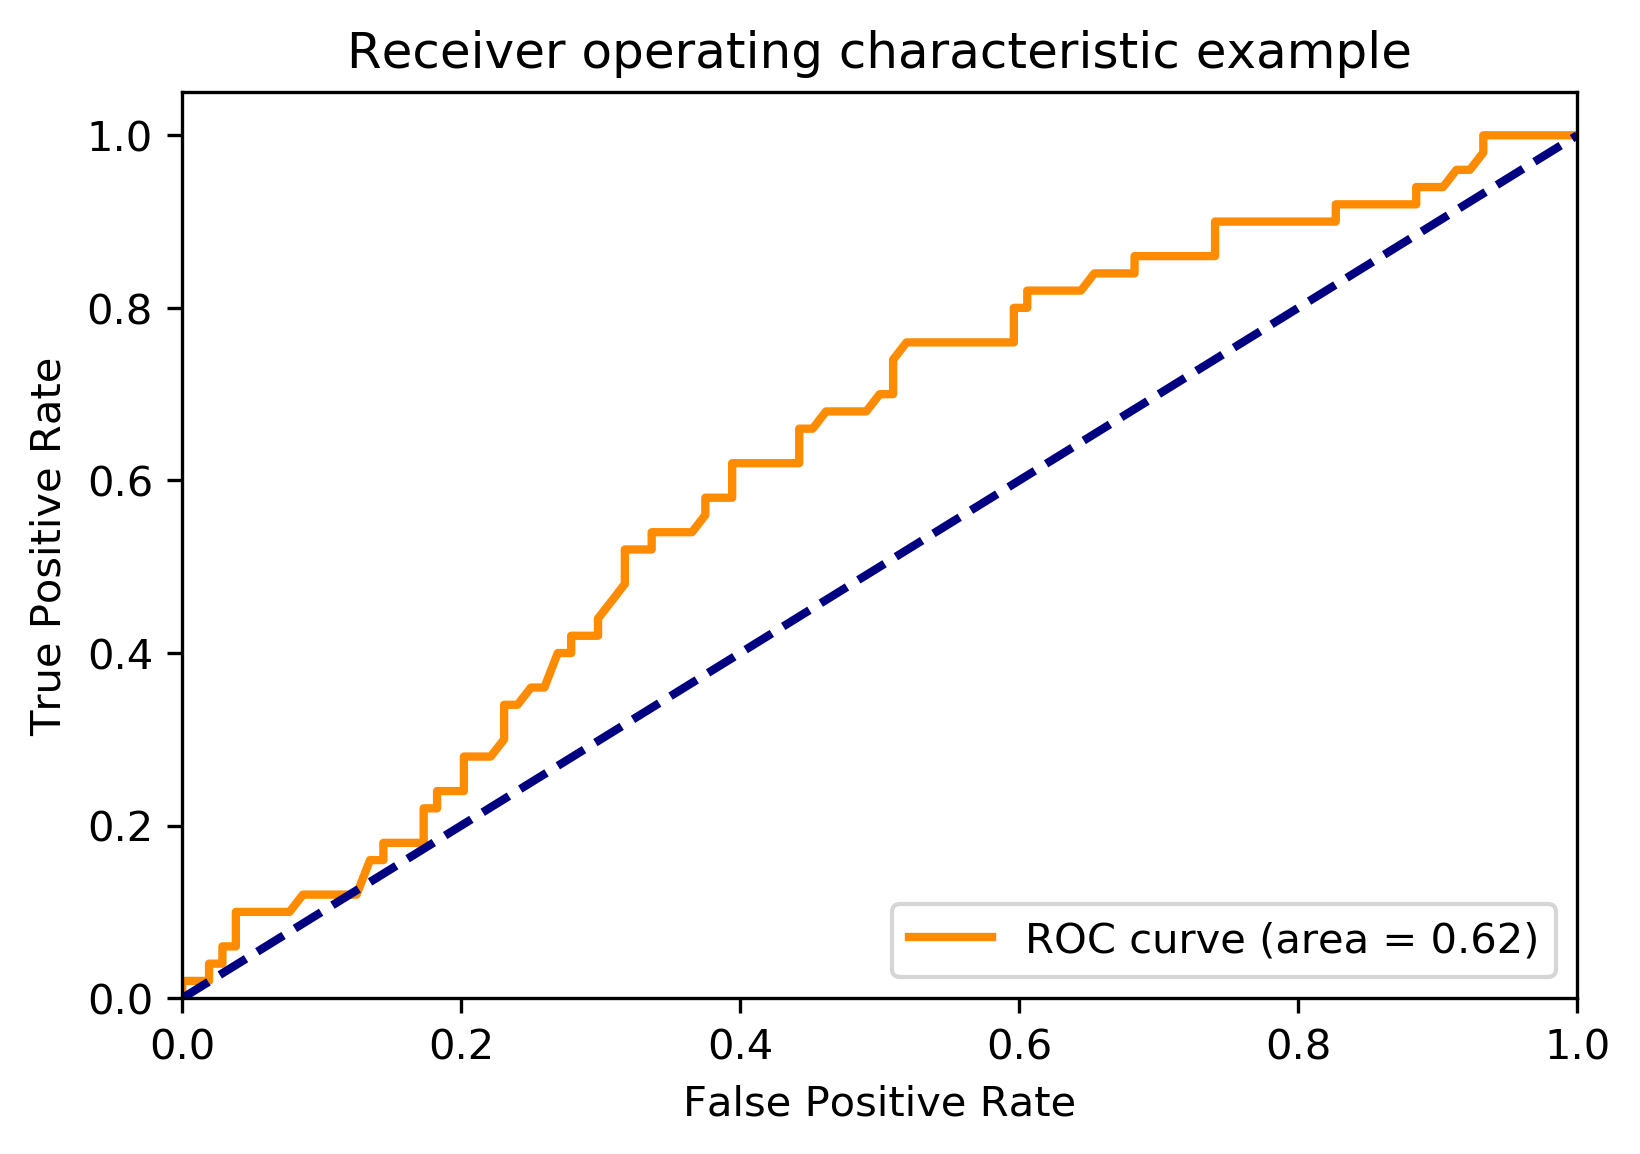

In [56]:
'''Draw nice ROC curves'''
# pixel, resolution of picture
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.figure()
# linewidth
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()